In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [2]:
Crime_Data = pd.read_csv('Crime_Data_from_2010_to_Present.csv',
                        na_values = [None, 'NaN','Nothing'], header = 0) 

In [3]:
Crime_Data.head()

,:@computed_region_2dna_qi2s,:@computed_region_k96s_3jcv,:@computed_region_kqwf_mjcx,:@computed_region_qz3q_ghft,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,area_id,area_name,crm_cd,crm_cd_1,...,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,26.0,626.0,7.0,23667,1086.0,NaN,7,Wilshire,930,930,...,PARK/PLAYGROUND,724,AA,Adult Arrest,1050,41,B,M,VERBAL THREAT,511.0
1,26.0,635.0,7.0,23667,332.0,NaN,7,Wilshire,626,626,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",735,AA,Adult Arrest,600,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
2,26.0,633.0,6.0,23679,809.0,NaN,7,Wilshire,930,930,...,PARKING LOT,721,AA,Adult Arrest,2350,20,H,F,VERBAL THREAT,511.0
3,52.0,612.0,12.0,23080,1229.0,NaN,7,Wilshire,626,626,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",759,AA,Adult Arrest,2330,35,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0
4,69.0,651.0,12.0,23080,1105.0,NaN,7,Wilshire,236,236,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",787,AO,Adult Other,2000,43,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0


In [4]:
Crime_Data.keys()

Index([':@computed_region_2dna_qi2s', ':@computed_region_k96s_3jcv',
       ':@computed_region_kqwf_mjcx', ':@computed_region_qz3q_ghft',
       ':@computed_region_tatf_ua23', ':@computed_region_ur2y_g4cx', 'area_id',
       'area_name', 'crm_cd', 'crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4',
       'crm_cd_desc', 'cross_street', 'date_occ', 'date_rptd', 'dr_no',
       'location', 'location_1', 'location_1_address', 'location_1_city',
       'location_1_state', 'location_1_zip', 'mocodes', 'premis_cd',
       'premis_desc', 'rpt_dist_no', 'status', 'status_desc', 'time_occ',
       'vict_age', 'vict_descent', 'vict_sex', 'weapon_desc',
       'weapon_used_cd'],
      dtype='object')

In [5]:
df=Crime_Data
df = df[pd.notnull(df['area_id'])]
df = df[pd.notnull(df['vict_age'])]
df = df[pd.notnull(df['vict_sex'])]#result, arrested or not
#df = df[pd.notnull(df['area_id'])]
df = df[pd.notnull(df['vict_descent'])]
df = df[pd.notnull(df['status'])]

In [6]:
# Label encoding of species column numerically
le = LabelEncoder()
le.fit(df['area_id'])
print(list(le.classes_))
df['area_id_label'] = le.transform(df['area_id'])

le = LabelEncoder()
le.fit(df['vict_sex'])
print(list(le.classes_))
df['vict_sex_label'] = le.transform(df['vict_sex'])

le = LabelEncoder()
le.fit(df['vict_descent'])
print(list(le.classes_))
df['vict_descent_label'] = le.transform(df['vict_descent'])

le = LabelEncoder()
le.fit(df['status'])
print(list(le.classes_))
df['status_label'] = le.transform(df['status'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
['F', 'M']
['A', 'B', 'C', 'H', 'K', 'O', 'W', 'X']
['AA', 'AO', 'IC', 'JA', 'JO']


In [7]:
df.head()

,:@computed_region_2dna_qi2s,:@computed_region_k96s_3jcv,:@computed_region_kqwf_mjcx,:@computed_region_qz3q_ghft,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,area_id,area_name,crm_cd,crm_cd_1,...,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,area_id_label,vict_sex_label,vict_descent_label,status_label
0,26.0,626.0,7.0,23667,1086.0,NaN,7,Wilshire,930,930,...,1050,41,B,M,VERBAL THREAT,511.0,6,1,1,0
1,26.0,635.0,7.0,23667,332.0,NaN,7,Wilshire,626,626,...,600,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,6,0,5,0
2,26.0,633.0,6.0,23679,809.0,NaN,7,Wilshire,930,930,...,2350,20,H,F,VERBAL THREAT,511.0,6,0,3,0
3,52.0,612.0,12.0,23080,1229.0,NaN,7,Wilshire,626,626,...,2330,35,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,6,1,5,0
4,69.0,651.0,12.0,23080,1105.0,NaN,7,Wilshire,236,236,...,2000,43,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,6,0,4,1


In [12]:
df_matrix = pd.DataFrame.as_matrix(df[['area_id_label','vict_sex_label','vict_descent_label','vict_age','status_label']])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
cluster_model = KMeans(n_clusters=2, random_state=10)

In [14]:
print(cluster_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)


In [15]:
cluster_model.fit(df_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [16]:
cluster_labels = cluster_model.fit_predict(df_matrix)

In [17]:
i=df
i['predarr'] = cluster_labels
i.head(6)

,:@computed_region_2dna_qi2s,:@computed_region_k96s_3jcv,:@computed_region_kqwf_mjcx,:@computed_region_qz3q_ghft,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,area_id,area_name,crm_cd,crm_cd_1,...,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,area_id_label,vict_sex_label,vict_descent_label,status_label,predarr
0,26.0,626.0,7.0,23667,1086.0,NaN,7,Wilshire,930,930,...,41,B,M,VERBAL THREAT,511.0,6,1,1,0,1
1,26.0,635.0,7.0,23667,332.0,NaN,7,Wilshire,626,626,...,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,6,0,5,0,0
2,26.0,633.0,6.0,23679,809.0,NaN,7,Wilshire,930,930,...,20,H,F,VERBAL THREAT,511.0,6,0,3,0,0
3,52.0,612.0,12.0,23080,1229.0,NaN,7,Wilshire,626,626,...,35,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,6,1,5,0,0
4,69.0,651.0,12.0,23080,1105.0,NaN,7,Wilshire,236,236,...,43,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,6,0,4,1,1
5,69.0,651.0,12.0,23080,1105.0,NaN,7,Wilshire,236,236,...,44,H,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,6,1,3,1,1


E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


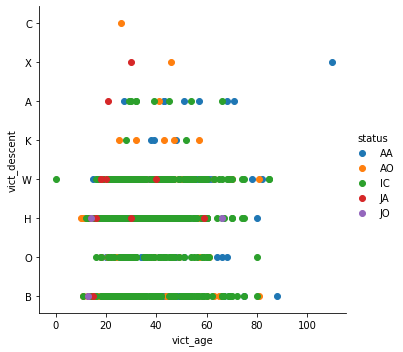

In [18]:
sns.FacetGrid(i, hue="status", size=5).map(plt.scatter, "vict_age", 
                                           "vict_descent").add_legend()

In [19]:
le.classes_

array(['AA', 'AO', 'IC', 'JA', 'JO'], dtype=object)

In [20]:
le.fit(df['vict_descent'])
print(list(le.classes_))

['A', 'B', 'C', 'H', 'K', 'O', 'W', 'X']


In [21]:
df.tail()

,:@computed_region_2dna_qi2s,:@computed_region_k96s_3jcv,:@computed_region_kqwf_mjcx,:@computed_region_qz3q_ghft,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,area_id,area_name,crm_cd,crm_cd_1,...,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,area_id_label,vict_sex_label,vict_descent_label,status_label,predarr
995,6.0,705.0,13.0,22727,972.0,7.0,13,Newton,330,330,...,41,H,M,NaN,NaN,12,1,3,2,1
996,NaN,737.0,13.0,23668,988.0,7.0,13,Newton,440,440,...,14,B,M,NaN,NaN,12,1,1,2,0
997,46.0,787.0,13.0,22352,995.0,7.0,13,Newton,330,330,...,23,H,M,NaN,NaN,12,1,3,2,0
998,6.0,702.0,13.0,22727,969.0,7.0,13,Newton,330,330,...,32,H,F,NaN,NaN,12,0,3,2,0
999,76.0,703.0,9.0,23076,1018.0,NaN,13,Newton,330,330,...,37,O,M,NaN,NaN,12,1,5,2,0


In [22]:
df.vict_descent.unique()

array(['B', 'O', 'H', 'K', 'W', 'A', 'X', 'C'], dtype=object)

In [23]:
df.status_desc.unique()

array(['Adult Arrest', 'Adult Other', 'Invest Cont', 'Juv Arrest',
       'Juv Other'], dtype=object)

In [24]:
#Adult Arrest, Adult not arrested, Invest Continuing, Juvenile Arrest,
                                    # and Juvenile not arrested

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


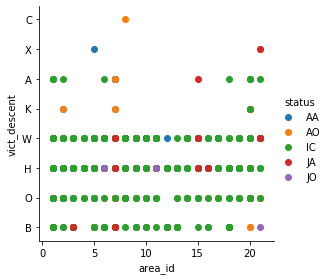

In [29]:
sns.FacetGrid(i, hue="status", size=4).map(plt.scatter, "area_id", 
                                           "vict_descent").add_legend()

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


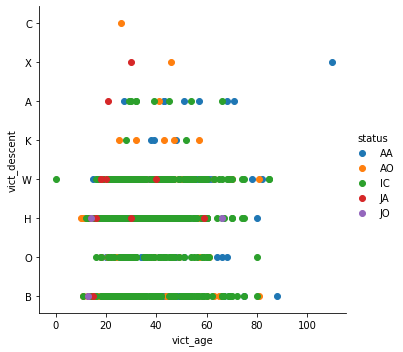

In [27]:
sns.FacetGrid(i, hue="status", size=5).map(plt.scatter, "vict_age", 
                                           "vict_descent").add_legend()

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


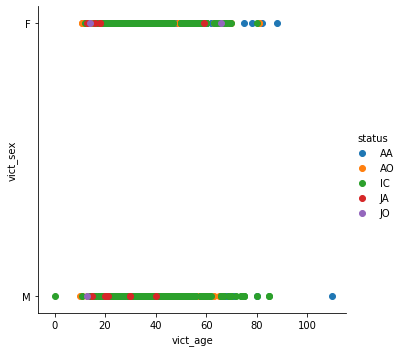

In [30]:
sns.FacetGrid(i, hue="status", size=5).map(plt.scatter, "vict_age", 
                                           "vict_sex").add_legend()